In [1]:
%matplotlib inline
import os
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.svm import SVC
path = os.getcwd()

Read and visualise the dataset

In [2]:
trainingPoints = pd.read_csv(os.path.join(path,'data','xtrain.cvs'),header=None).get_values()
testPoints = pd.read_csv(os.path.join(path,'data','xtest.cvs'),header=None).get_values()
trainingLabels = pd.read_csv(os.path.join(path,'data','ytrain.cvs'),header=None).get_values()[:,0]
testLabels = pd.read_csv(os.path.join(path,'data','ytest.cvs'),header=None).get_values()[:,0]

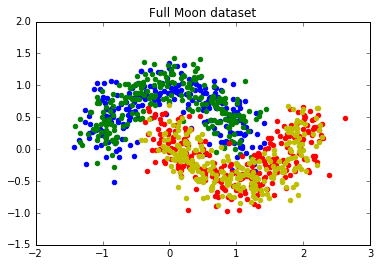

In [3]:
plt.title('Full Moon dataset')
plt.scatter(trainingPoints[:,0:1][trainingLabels==1],trainingPoints[:,1:2][trainingLabels==1],color='b')
plt.scatter(testPoints[:,0:1][testLabels==1],testPoints[:,1:2][testLabels==1],color='g')
plt.scatter(trainingPoints[:,0:1][trainingLabels==2],trainingPoints[:,1:2][trainingLabels==2],color='r')
plt.scatter(testPoints[:,0:1][testLabels==2],testPoints[:,1:2][testLabels==2],color='y')
plt.show()

Create a function svm_fit, which takes a matrix X ∈ Rn×m of samples, a vector y ∈ Nn of outcomes for each sample, and a kernel. svm_fit should return the estimated predicted value and evaluate different evaluation criteria on the training samples.

In [4]:
def svm_fit(X,y,cValue=1.0, kernelType='rbf', gammaValue='auto'):
    model = SVC(C=cValue, kernel=kernelType, gamma=gammaValue)
    model.fit(X,y)
    y_pred = model.predict(X)
    tp = y[y_pred==1][y[y_pred==1]==1].shape[0]
    fp = y[y_pred==1][y[y_pred==1]==2].shape[0]
    tn = y[y_pred==2][y[y_pred==2]==2].shape[0]
    fn = y[y_pred==2][y[y_pred==2]==1].shape[0]
    sensitivity                 = tp        / (tp+fn)
    if (fp+tp)==0:
        precision = None
    else:
        precision               = tp        / (fp+tp)
    specificity                 = tn        / (tn+fp)
    negativePredictiveValue     = tn        / (tn+fn)
    accuracy                    = (tp+tn)   / (tp+fp+fn+tn)
    f1Score                     = (2*tp)    / (2*tp + fp + fn)
    return model, {'sensitivity':sensitivity, 'precision':precision, 'specificity':specificity, 'npv':negativePredictiveValue, 'accuracy':accuracy, 'f1':f1Score}, y_pred 

Create a function svm_predict receiving the model trained above, a matrix Xt of samples for testing and their expected outcomes yt. The function should return a vector of predicted outcomes and the different evaluation criteria on the testing samples.

In [5]:
def svm_predict(model,X,y):
    y_pred = model.predict(X)
    tp = y[y_pred==1][y[y_pred==1]==1].shape[0]
    fp = y[y_pred==1][y[y_pred==1]==2].shape[0]
    tn = y[y_pred==2][y[y_pred==2]==2].shape[0]
    fn = y[y_pred==2][y[y_pred==2]==1].shape[0]
    sensitivity                 = tp        / (tp+fn)
    if (fp+tp)==0:
        precision = None
    else:
        precision               = tp        / (fp+tp)
    specificity                 = tn        / (tn+fp)
    negativePredictiveValue     = tn        / (tn+fn)
    accuracy                    = (tp+tn)   / (tp+fp+fn+tn)
    f1Score                     = (2*tp)    / (2*tp + fp + fn)
    return y_pred, {'sensitivity':sensitivity, 'precision':precision, 'specificity':specificity, 'npv':negativePredictiveValue, 'accuracy':accuracy, 'f1':f1Score}

Plot with two curves the mean squared train error and testing error for different C and gamma parameters.

In [6]:
Cs = [0.001,0.01,0.1,1,10,20,50,100,200,500,1000,10000,100000]
gammas = [10**x for x in range(-5,5)]

MSE for RBF kernel, gamma=1

In [7]:
RBFtrainingMSE = []
RBFtestMSE = []
for c in Cs:
    rbf_model = svm_fit(trainingPoints,trainingLabels,cValue=c, gammaValue=1)
    RBFtrainingMSE.append(1-rbf_model[1]['accuracy'])
    RBFtestMSE.append(1-svm_predict(rbf_model[0],testPoints,testLabels)[1]['accuracy'])

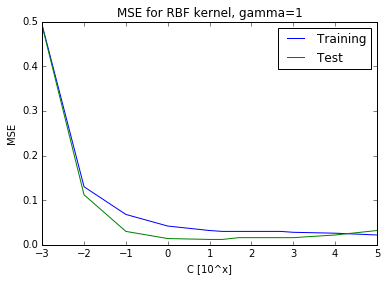

In [8]:
plt.title('MSE for RBF kernel, gamma=1');plt.xlabel('C [10^x]');plt.ylabel('MSE')
plt.plot([log(x,10) for x in Cs],RBFtrainingMSE, label='Training')
plt.plot([log(x,10) for x in Cs], RBFtestMSE, label='Test')
plt.legend(loc=1);plt.show()

MSE for linear kernel, gamma=1

In [9]:
linearTrainingMSE = []
linearTestMSE = []
for c in Cs:
    linear_model = svm_fit(trainingPoints,trainingLabels,cValue=c, kernelType='linear', gammaValue=1)
    linearTrainingMSE.append(1-linear_model[1]['accuracy'])
    linearTestMSE.append(1-svm_predict(linear_model[0],testPoints,testLabels)[1]['accuracy'])

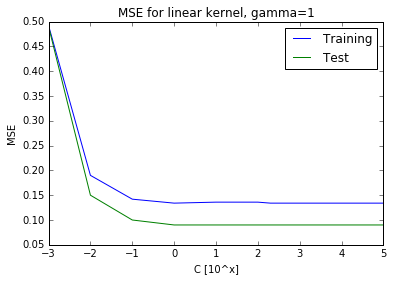

In [10]:
plt.title('MSE for linear kernel, gamma=1');plt.xlabel('C [10^x]');plt.ylabel('MSE')
plt.plot([log(x,10) for x in Cs],linearTrainingMSE, label='Training')
plt.plot([log(x,10) for x in Cs], linearTestMSE, label='Test')
plt.legend(loc=1);plt.show()

MSE for RBF kernel, C=bestC

In [11]:
bestC = Cs[np.argmin(RBFtestMSE)]
gammaTrainingMSE = []
gammaTestMSE = []
for g in gammas:
    rbf_model = svm_fit(trainingPoints,trainingLabels,cValue=bestC, gammaValue=g)
    gammaTrainingMSE.append(1-rbf_model[1]['accuracy'])
    gammaTestMSE.append(1-svm_predict(rbf_model[0],testPoints,testLabels)[1]['accuracy'])

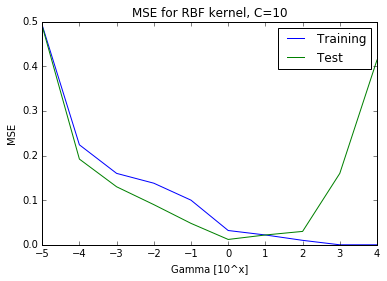

In [12]:
plt.title('MSE for RBF kernel, C='+str(bestC));plt.xlabel('Gamma [10^x]');plt.ylabel('MSE')
plt.plot([log(x,10) for x in gammas], gammaTrainingMSE, label='Training')
plt.plot([log(x,10) for x in gammas], gammaTestMSE, label='Test')
plt.legend(loc=1);plt.show()

Additionally, program a function that creates (animated) 2D plots of the points comparing the predicted vs. true values for every combination of parameters.

<IPython.core.display.Javascript object>


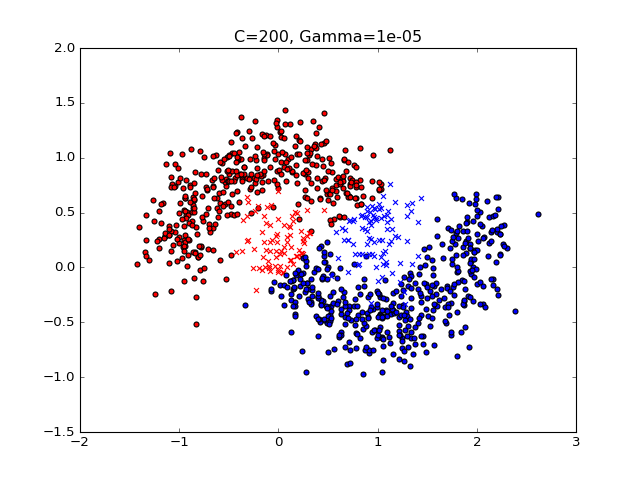

In [13]:
%matplotlib nbagg
def animate(i,data):
    Cs = [0.001,0.01,0.1,1,10,20,50,100,200,500,1000,10000]
    gammas = [10**x for x in range(-5,5)]
    i = i%(len(Cs)*len(gammas))
    ax.clear()
    model = svm_fit(data[0],data[1],cValue=Cs[i%len(Cs)], gammaValue=gammas[i//len(Cs)])
    tp = data[0][np.logical_and(model[2]==1,(data[1]==1))]
    fp = data[0][np.logical_and(model[2]==1,(data[1]==2))]
    tn = data[0][np.logical_and(model[2]==2,(data[1]==2))]
    fn = data[0][np.logical_and(model[2]==2,(data[1]==1))]
    ax.scatter(tp[:,0],tp[:,1],c='r',marker='o')
    ax.scatter(fp[:,0],fp[:,1],c='r',marker='x')
    ax.scatter(tn[:,0],tn[:,1],c='b',marker='o')
    ax.scatter(fn[:,0],fn[:,1],c='b',marker='x')
    ax.set_title('C='+str(Cs[i%len(Cs)])+', Gamma='+str(gammas[i//len(Cs)]))
fig = plt.figure()
ax = fig.add_subplot(111)
ani = animation.FuncAnimation(fig, animate, fargs=[[np.concatenate((trainingPoints, testPoints)),np.concatenate((trainingLabels,testLabels))]], interval=1000)
plt.show()